In [2]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
from scipy import optimize
import csv

## This script analysis the JDDC fitting result with wrong initialization

In [25]:
# Extract all peak positions from csv file
path = 'D:/2020/JDDC/DoseTest_exp/10Frames/10Frames_B1_WrongInitialization/'
csvFileName = path + 'bump-0_003-centers.csv'
txtFileName = path + 'bump-0_003.txt'
start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        peaks_x.append(float(row[0]))
        peaks_y.append(float(row[1]))
        
with open(txtFileName) as f:
    content = f.readlines()
    content = [x.strip() for x in content]
    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
print(len(peaks_x))
print(len(peaks_int))
print(len(peaks_y))

196
196
196


(-23.849999999999998,
 170.84999999999997,
 -19.799999999999997,
 173.79999999999998)

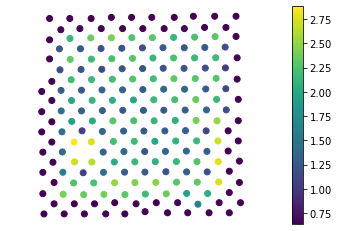

In [36]:
plt.scatter(peaks_x, peaks_y,c=np.asarray(peaks_int))
plt.colorbar()
plt.axis('equal')
plt.axis('off')

In [44]:
# Filter the peaks to exclude the ones around the border
array_x = np.asarray(peaks_x)
array_y = np.asarray(peaks_y)
array_int = np.asarray(peaks_int)
index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
array_x = array_x[index]
array_y = array_y[index]
array_int = array_int[index]
# Filter the peaks to exclude Ti peaks
threshold = 1.5    # set a threshold to distinguish two sets of sub-lattice
lattice1 = np.where(array_int>threshold)
array_x1 = array_x[lattice1]
array_y1 = array_y[lattice1]
array_int1 = array_int[lattice1]

(3.919669999999998, 146.40773, 10.986989999999999, 133.61081)

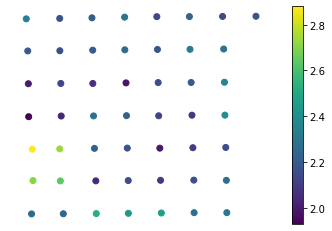

In [45]:
plt.scatter(array_x1, array_y1,c=np.asarray(array_int1))
plt.colorbar()
plt.axis('equal')
plt.axis('off')

(5.966214999999998, 129.102085, 11.911189999999998, 114.20260999999998)

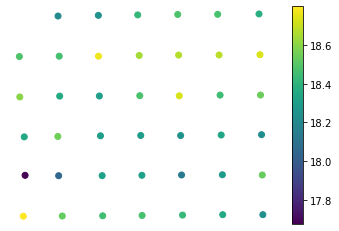

In [55]:
x_cor, y_cor, y_sep = FindYStd(array_x1, array_y1, 18)
plt.scatter(x_cor, y_cor, c=y_sep)
plt.colorbar()
plt.axis('equal')
plt.axis('off')

In [53]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    x_cor = []
    y_cor = []
    while array_x1_copy.size != 0:
        index = np.where((array_x1_copy<array_x1_copy[0]+3) & (array_x1_copy>array_x1_copy[0]-3))
        array_y_sub = array_y1_copy[index]
        array_x_sub = array_x1_copy[index]
        array_x_sub = [array_x_sub for _,array_x_sub in sorted(zip(array_y_sub,array_x_sub))]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
                x_cor.append(array_x_sub[i])
                y_cor.append(array_y_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    return x_cor, y_cor, y_sep

In [49]:
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]

Z = [x for _,x in sorted(zip(Y,X))]
print(Z)  # ["a", "d", "h", "b", "c", "e", "i", "f", "g"]

['a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g']


In [50]:
print(Y)

[0, 1, 1, 0, 1, 2, 2, 0, 1]
